# British Airways Sentiment Analysis

## Importing Dependencies


In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [5]:
tokens = tokenizer.encode('I love programming and coding', return_tensors='pt')

In [6]:
tokens

tensor([[  101,   151, 11157, 23515, 10110, 67911, 10422,   102]])

In [7]:
result = model(tokens)

In [8]:
result.logits

tensor([[-2.1768, -1.9639, -0.4744,  1.3873,  2.4903]],
       grad_fn=<AddmmBackward0>)

In [9]:
int(torch.argmax(result.logits))+1

5

In [10]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews") 

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3817 total reviews
Scraping page 5
   ---> 3817 total reviews
Scraping page 6
   ---> 3817 total reviews
Scraping page 7
   ---> 3817 total reviews
Scraping page 8
   ---> 3817 total reviews
Scraping page 9
   ---> 3817 total reviews
Scraping page 10
   ---> 3817 total reviews


In [12]:

import pandas as pd
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | While BA may have made some...
1,✅ Trip Verified | British Airways new Club Sui...
2,"✅ Trip Verified | Four very pleasant, on time..."
3,Not Verified | We travel extensively over 25...
4,✅ Trip Verified | Flight delayed an hour due ...


In [13]:
df.tail()

,reviews
3812,Flight from Heathrow to Toronto. Booked emerge...
3813,LHR to HAM. Purser addresses all club passenge...
3814,My son who had worked for British Airways urge...
3815,London City-New York JFK via Shannon on A318 b...
3816,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [14]:
df['reviews'].iloc[0]

"✅ Trip Verified |  While BA may have made some positive improvements to its Club World product, its World Traveler product and catering leaves much to be desired. The first meal service was very slow, more than 3 hours to serve the meal. The portions were incredibly small - the chicken dish contained maybe 5 pieces of chicken, 2 pieces of broccoli, and a piece of unknown food. Small snacks were available during the flight, but the real let down was the snack before landing in Vancouver. It was a bizarre tasting chicken pastry wrap, which didn't have much chicken and did not taste at all like a pastry. It was too sweet, too mushy, and too salty. The seats, although not exactly spacious, were tolerable, although the aisles are very narrow, and cabin crew and other passengers frequently bumped into me while walking up and down the aisles. Cabin crew were generally responsive to passengers' request, and once or twice during the flight, came down the aisles with drinks. However, the poor l

In [15]:
df.to_csv("C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/BA_reviews.csv")

In [23]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/BA_reviews.csv'
reviews_df = pd.read_csv(file_path)

# Define a function to clean the reviews
def clean_review_text(text):
    text = text.replace("✅ Trip Verified", "")
    text = text.replace("Not Verified", "")
    texr = text.replace("|", "")
    return text.strip()

# Apply the cleaning function to the reviews column
reviews_df['cleaned_reviews'] = reviews_df['reviews'].apply(clean_review_text)

# Display the first few rows of the cleaned data
print(reviews_df.head())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Cleaned_BA_reviews.csv'
reviews_df.to_csv(cleaned_file_path, index=False)


   Unnamed: 0                                            reviews  \
0           0  ✅ Trip Verified |  While BA may have made some...   
1           1  ✅ Trip Verified | British Airways new Club Sui...   
2           2  ✅ Trip Verified |  Four very pleasant, on time...   
3           3  Not Verified |   We travel extensively over 25...   
4           4  ✅ Trip Verified |  Flight delayed an hour due ...   

                                     cleaned_reviews  
0  |  While BA may have made some positive improv...  
1  | British Airways new Club Suite is a marked i...  
2  |  Four very pleasant, on time flights with fr...  
3  |   We travel extensively over 25 years and te...  
4  |  Flight delayed an hour due to bad weather a...  


In [24]:
df = pd.read_csv('C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Cleaned_BA_reviews.csv')

In [25]:
df.head()

,Unnamed: 0,reviews,cleaned_reviews
0,0,✅ Trip Verified | While BA may have made some...,| While BA may have made some positive improv...
1,1,✅ Trip Verified | British Airways new Club Sui...,| British Airways new Club Suite is a marked i...
2,2,"✅ Trip Verified | Four very pleasant, on time...","| Four very pleasant, on time flights with fr..."
3,3,Not Verified | We travel extensively over 25...,| We travel extensively over 25 years and te...
4,4,✅ Trip Verified | Flight delayed an hour due ...,| Flight delayed an hour due to bad weather a...


In [27]:
import pandas as pd

# Load the cleaned CSV file
cleaned_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Cleaned_BA_reviews.csv'
cleaned_reviews_df = pd.read_csv(cleaned_file_path)

# Drop the original reviews column and rename the cleaned_reviews column to reviews
cleaned_reviews_df.drop(columns=['reviews'], inplace=True)
cleaned_reviews_df.rename(columns={'cleaned_reviews': 'reviews'}, inplace=True)
cleaned_reviews_df.drop(columns=['Unnamed: 0'], inplace=True)

# Save the updated DataFrame to a new CSV file
final_cleaned_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Final_Cleaned_BA_reviews.csv'
cleaned_reviews_df.to_csv(final_cleaned_file_path, index=False)

# Display the first few rows of the updated DataFrame
print(cleaned_reviews_df.head())


                                             reviews
0  |  While BA may have made some positive improv...
1  | British Airways new Club Suite is a marked i...
2  |  Four very pleasant, on time flights with fr...
3  |   We travel extensively over 25 years and te...
4  |  Flight delayed an hour due to bad weather a...


In [28]:
df.shape

(3817, 3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3817 non-null   int64 
 1   reviews          3817 non-null   object
 2   cleaned_reviews  3817 non-null   object
dtypes: int64(1), object(2)
memory usage: 89.6+ KB


In [33]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the final cleaned CSV file
final_cleaned_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Final_Cleaned_BA_reviews.csv'
final_reviews_df = pd.read_csv(final_cleaned_file_path)

# Load the pre-trained sentiment analysis model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Define the sentiment_score function with truncation
def sentiment_score(reviews):
    tokens = tokenizer.encode(reviews, return_tensors='pt', max_length=512, truncation=True)
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1

# Apply the sentiment_score function to the reviews column
final_reviews_df['sentiment'] = final_reviews_df['reviews'].apply(sentiment_score)

# Save the updated DataFrame with sentiment scores to a new CSV file
sentiment_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Final_Reviews_with_Sentiment.csv'
final_reviews_df.to_csv(sentiment_file_path, index=False)

# Display the first few rows of the updated DataFrame
print(final_reviews_df.head())


                                             reviews  sentiment
0  |  While BA may have made some positive improv...          2
1  | British Airways new Club Suite is a marked i...          3
2  |  Four very pleasant, on time flights with fr...          4
3  |   We travel extensively over 25 years and te...          1
4  |  Flight delayed an hour due to bad weather a...          2


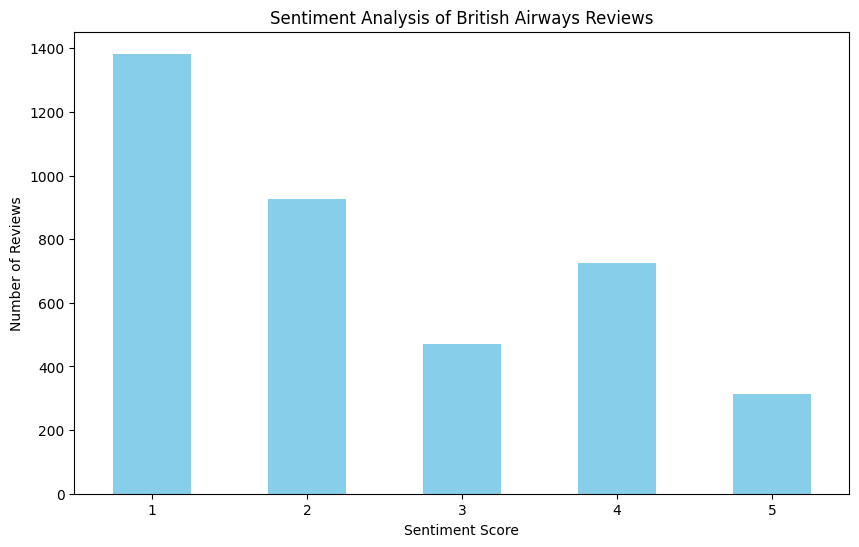

In [35]:
import matplotlib.pyplot as plt
# Plot the sentiment analysis results
plt.figure(figsize=(10, 6))
final_reviews_df['sentiment'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis of British Airways Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

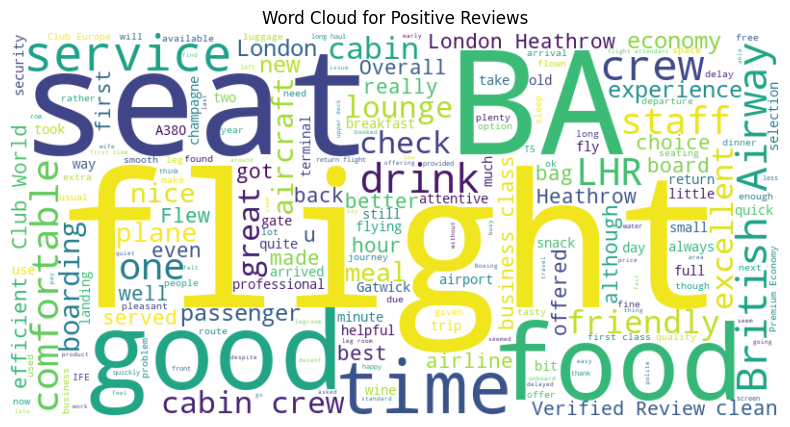

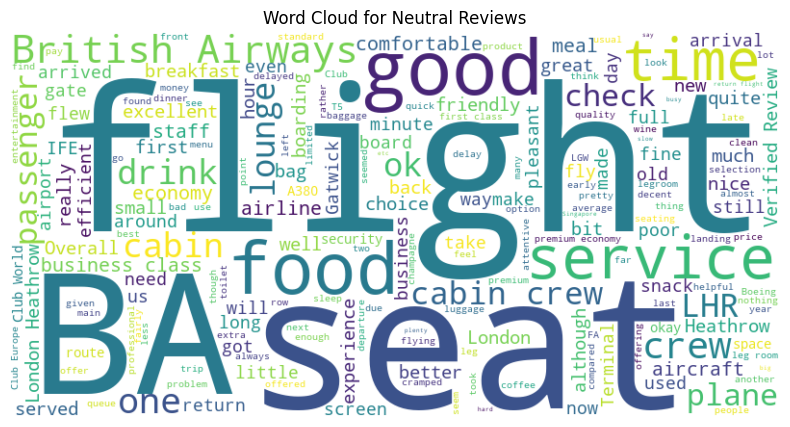

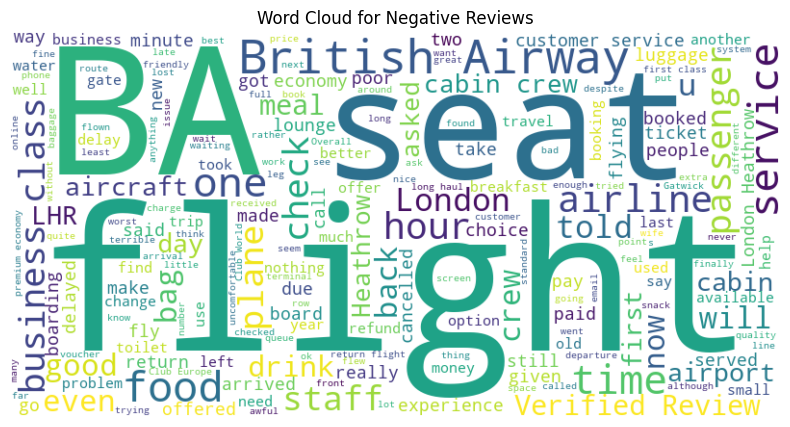

In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the final cleaned CSV file with sentiment scores
final_cleaned_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Final_Reviews_with_Sentiment.csv'
final_reviews_df = pd.read_csv(final_cleaned_file_path)

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filter reviews by sentiment
positive_reviews = ' '.join(final_reviews_df[final_reviews_df['sentiment'] > 3]['reviews'])
neutral_reviews = ' '.join(final_reviews_df[final_reviews_df['sentiment'] == 3]['reviews'])
negative_reviews = ' '.join(final_reviews_df[final_reviews_df['sentiment'] < 3]['reviews'])

# Generate and display word clouds
generate_word_cloud(positive_reviews, 'Word Cloud for Positive Reviews')
generate_word_cloud(neutral_reviews, 'Word Cloud for Neutral Reviews')
generate_word_cloud(negative_reviews, 'Word Cloud for Negative Reviews')



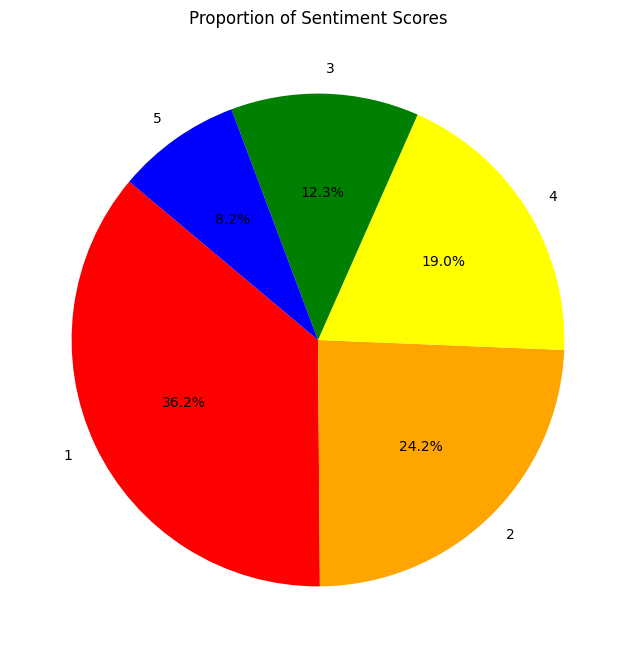

In [38]:
# Calculate the proportion of each sentiment score
sentiment_counts = final_reviews_df['sentiment'].value_counts(normalize=True)

# Plot a pie chart
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Proportion of Sentiment Scores')
plt.ylabel('')
plt.show()



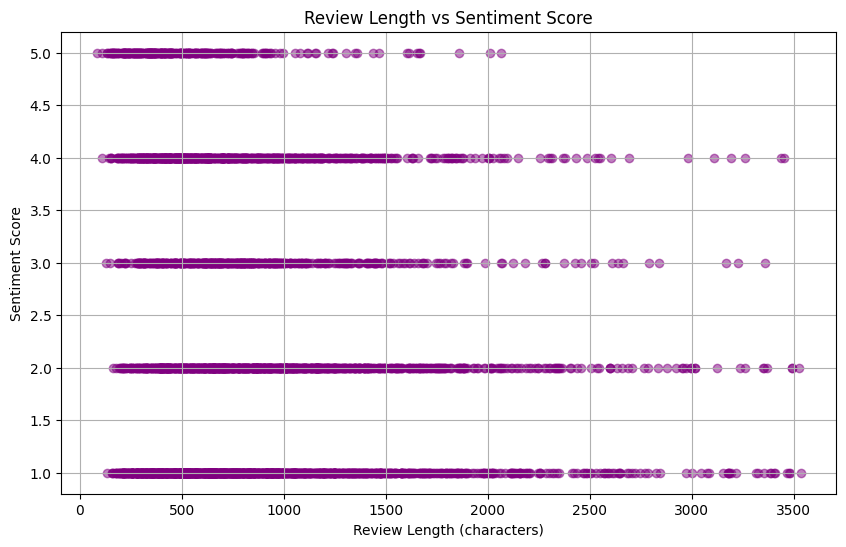

In [39]:
# Calculate the length of each review
final_reviews_df['review_length'] = final_reviews_df['reviews'].apply(len)

# Plot review length vs sentiment
plt.figure(figsize=(10, 6))
plt.scatter(final_reviews_df['review_length'], final_reviews_df['sentiment'], alpha=0.5, color='purple')
plt.title('Review Length vs Sentiment Score')
plt.xlabel('Review Length (characters)')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


In [40]:
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to get word frequencies by sentiment
def get_word_frequencies(sentiment):
    reviews = final_reviews_df[final_reviews_df['sentiment'] == sentiment]['reviews']
    words = ' '.join(reviews).split()
    words = [word for word in words if word.lower() not in stop_words]
    return Counter(words).most_common(10)

# Get the most common words for each sentiment
for sentiment in sorted(final_reviews_df['sentiment'].unique()):
    print(f"Sentiment {sentiment}:")
    common_words = get_word_frequencies(sentiment)
    for word, freq in common_words:
        print(f"{word}: {freq}")
    print("\n")


Sentiment 1:
flight: 2156
BA: 1680
|: 1052
British: 1042
-: 795
Airways: 792
service: 736
London: 713
would: 673
get: 657


Sentiment 2:
BA: 1266
flight: 1096
-: 795
seat: 565
service: 564
crew: 552
food: 540
seats: 516
British: 507
cabin: 487


Sentiment 3:
flight: 517
BA: 433
seat: 320
good: 320
-: 312
crew: 294
service: 257
cabin: 245
|: 238
seats: 238


Sentiment 4:
flight: 888
BA: 588
good: 561
crew: 408
service: 386
|: 352
food: 347
cabin: 341
-: 340
seat: 338


Sentiment 5:
flight: 295
|: 175
crew: 164
BA: 158
service: 139
good: 136
British: 129
London: 128
time: 115
food: 114




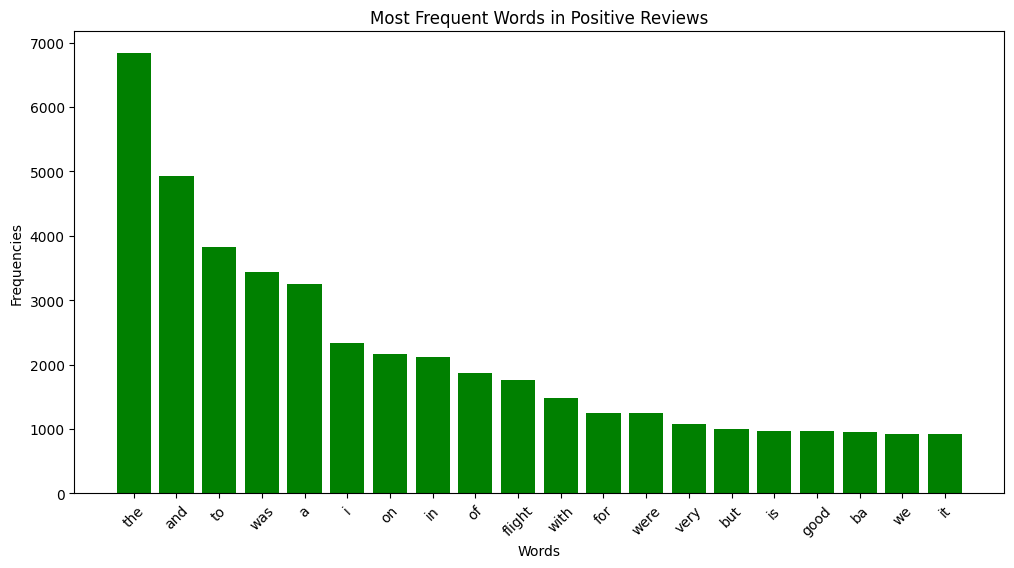

In [44]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Load the final cleaned CSV file with sentiment scores
final_cleaned_file_path = 'C:/Users/jckat/Downloads/Portfolio/Sentiment Analysis/British Airways/data/Final_Reviews_with_Sentiment.csv'
final_reviews_df = pd.read_csv(final_cleaned_file_path)

# Define a function to clean and tokenize text
def clean_tokenize(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove non-word characters and convert to lowercase
    tokens = text.split()
    return tokens

# Filter positive reviews
positive_reviews = ' '.join(final_reviews_df[final_reviews_df['sentiment'] > 3]['reviews'])

# Clean and tokenize positive reviews
positive_tokens = clean_tokenize(positive_reviews)

# Count the frequency of each word
word_freq = Counter(positive_tokens)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Plot the most frequent positive words
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='green')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Most Frequent Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()

